<a href="https://colab.research.google.com/github/JuanRenza/Imagenes/blob/master/Clase9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTACIONES Y METODOS**


In [84]:
from google.colab import drive
drive.mount('/content/drive')

#Importo las librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline
%cd /content/drive/My Drive/colab/Imagenes

def displayColor2(img,img2,title1,title2):
  plt.figure(figsize=(15,10))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(121), plt.imshow(img), plt.title(title1), plt.xticks([]), plt.yticks([])
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  plt.subplot(122), plt.imshow(img2), plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.show()

def displayGray4(img,img2,img3,img4):
  plt.figure(figsize=(15,10))
  plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.imshow(img2, cmap='gray'), plt.title("Filtrada"), plt.xticks([]), plt.yticks([])
  plt.subplot(223), plt.imshow(img3, cmap='gray'), plt.title("mascara"), plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.imshow(img4, cmap='gray'), plt.title("magnitud"), plt.xticks([]), plt.yticks([])
  plt.show()

def displayGray3(img,img2,img3,title1,title2,title3):
  plt.figure(figsize=(15,10))
  plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title(title1), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(img2, cmap='gray'), plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(img3, cmap='gray'), plt.title(title3), plt.xticks([]), plt.yticks([])
  plt.show()

def displayGray2(img,img2, title2):
  plt.figure(figsize=(15,10))
  plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(img2, cmap='gray'), plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/colab/Imagenes


**REVISION DEL ESPECTRO**

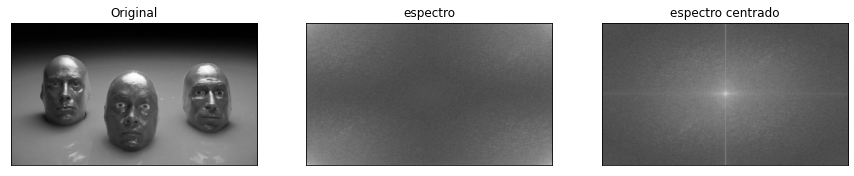

In [85]:
img=cv2.imread("B.jpg",0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
espectro = 20*np.log(np.abs(f))
espectro_centrado = 20*np.log(np.abs(fshift))

displayGray3(img, espectro, espectro_centrado,"Original","espectro", "espectro centrado")

**FILTRO PASABAJAS**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


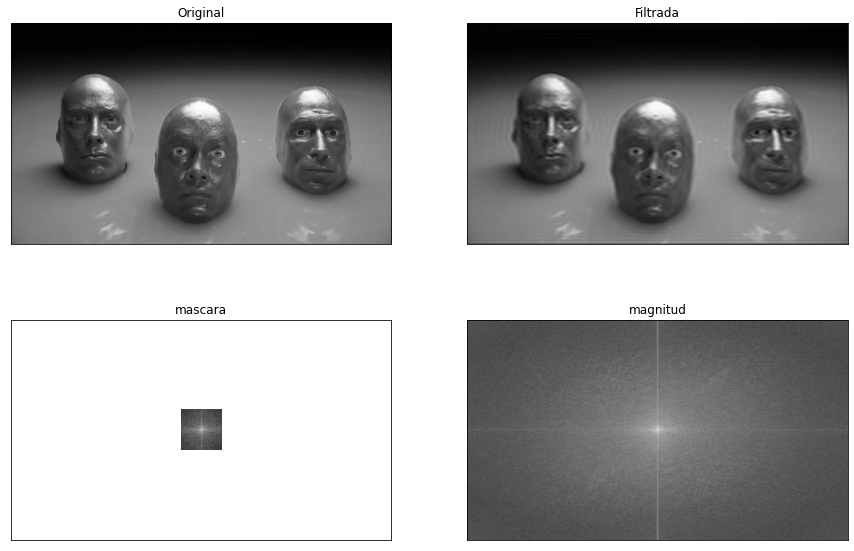

In [86]:
img=cv2.imread("B.jpg",0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
espectro_centrado = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils, centcols = fils/2, cols/2

#Creamos la mascara con un centro cuadrado de uno y el resto ceros
mask = np.zeros((fils,cols,2), np.uint8)
mask[np.int32(centfils)-60:np.int32(centfils)+60,np.int32(centcols)-60:np.int32(centcols)+60]=1

#Aplicamos la mascara y obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,espectro_centrado)

**FILTRO PASAALTAS**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


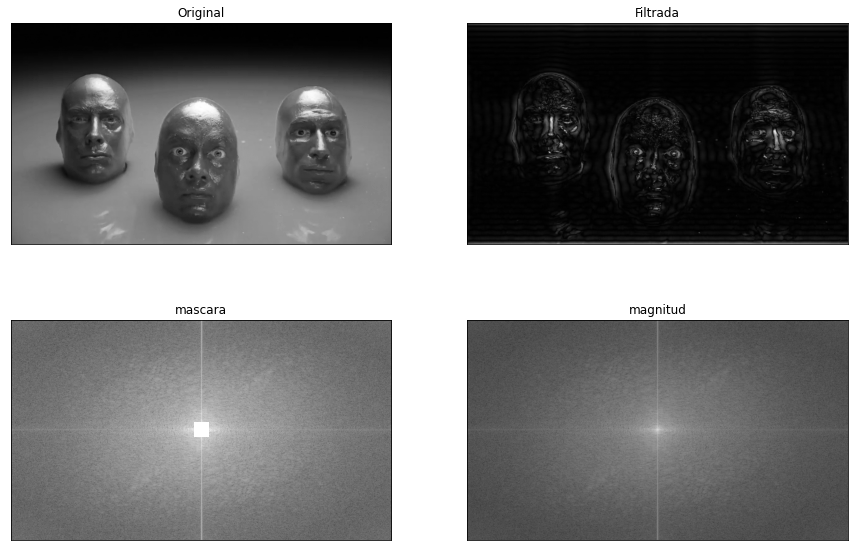

In [87]:
img=cv2.imread("B.jpg",0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
espectro_centrado = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils, centcols = fils/2, cols/2

#Creamos la mascara con un centro cuadrado de uno y el resto ceros
mask = np.ones((fils,cols,2), np.uint8)
mask[np.int32(centfils)-20:np.int32(centfils)+20,np.int32(centcols)-20:np.int32(centcols)+20]=0
#Aplicamos la mascara y obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,espectro_centrado)

**FILTRO PASAALTAS DE MASCARA REDONDA**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


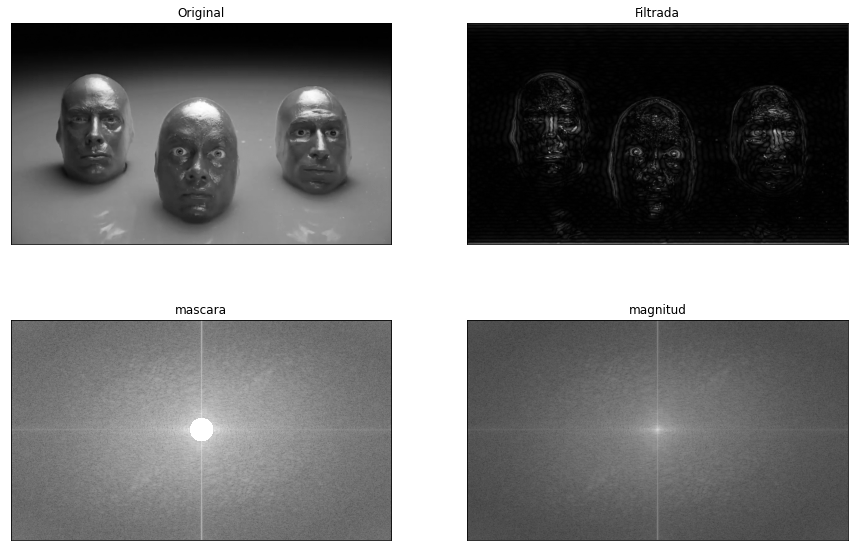

In [88]:
img=cv2.imread("B.jpg",0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
espectro_centrado = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fils,cols = img.shape
centfils, centcols = fils/2, cols/2

#Creamos la mascara con un centro cuadrado de uno y el resto ceros
r = 30
center = [centfils, centcols]
x,y = np.ogrid[:fils,:cols]
mask = np.ones((fils,cols,2), np.uint8)
mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
mask[mask_area] = 0

#Aplicamos la mascara y obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,espectro_centrado)

**FILTRO PASA BANDA**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


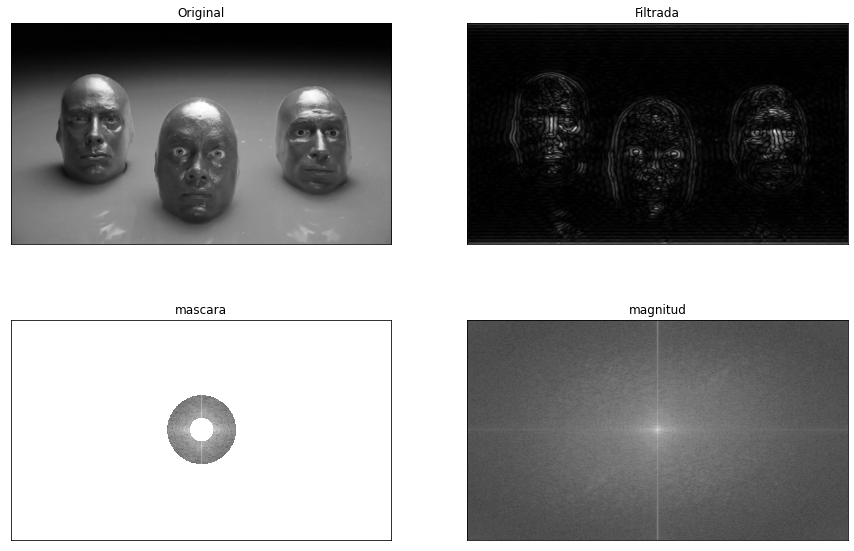

In [89]:
img=cv2.imread("B.jpg",0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
espectro_centrado = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fils,cols = img.shape
centfils, centcols = fils/2, cols/2

#Creamos la mascara con un centro cuadrado de uno y el resto ceros

center = [centfils, centcols]
x,y = np.ogrid[:fils,:cols]

r = 100
mask = np.zeros((fils,cols,2), np.uint8)
mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
mask[mask_area] = 1

r2 = 30
mask2 = np.ones((fils,cols,2), np.uint8)
mask_area2 = (x-center[0])**2 + (y-center[1])**2 <= r2*r2
mask2[mask_area2] = 0


#Aplicamos la mascara y obtenemos la inversa DFT
fshift = dft_shift*mask*mask2
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,espectro_centrado)

**FILTRO RECHAZABANDA**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


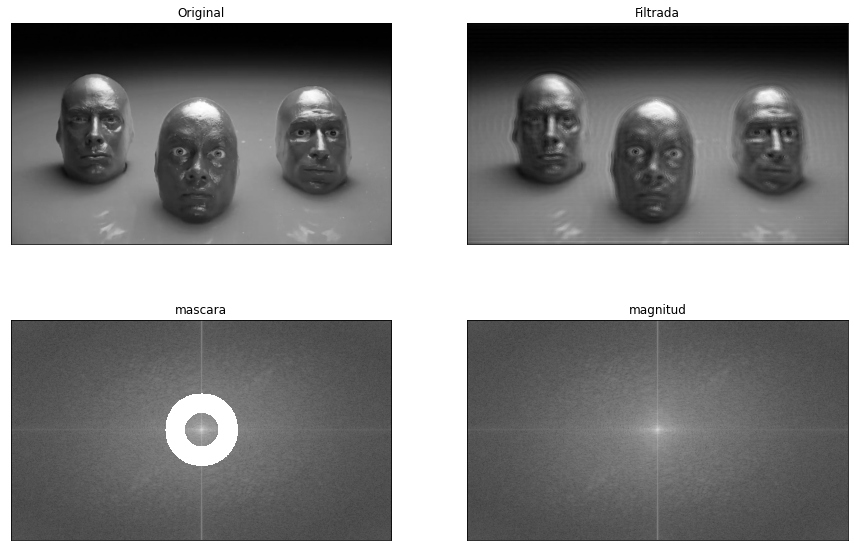

In [90]:
img=cv2.imread("B.jpg",0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
espectro_centrado = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fils,cols = img.shape
centfils, centcols = fils/2, cols/2

#Creamos la mascara con un centro cuadrado de uno y el resto ceros
center = [centfils, centcols]
x,y = np.ogrid[:fils,:cols]

r = 100
mask = np.ones((fils,cols,2), np.uint8)
mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
mask[mask_area] = 0

r2 = 50
mask2 = np.zeros((fils,cols,2), np.uint8)
mask_area2 = (x-center[0])**2 + (y-center[1])**2 <= r2*r2
mask2[mask_area2] = 1


#Aplicamos la mascara y obtenemos la inversa DFT
fshift = dft_shift*(mask+mask2)
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

displayGray4(img,img_back,fshift_mask_mag,espectro_centrado)